# Loading file

In [ ]:
from google.colab import files
import pandas as pd
import io

gamma = files.upload()
gamma = pd.read_csv(io.BytesIO(gamma['gamma.csv']))

Saving gamma.csv to gamma (2).csv


In [ ]:
gamma

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,38.7514,22.2191,3.1933,0.2666,0.1612,8.7684,38.9052,-10.5884,13.5898,113.6660,g
1,25.0243,18.4051,2.5453,0.4672,0.2949,2.8213,-21.7414,-15.2108,29.5560,141.1230,g
2,24.8746,16.3143,2.6518,0.4660,0.2375,7.8902,20.5957,14.1454,48.4930,150.9500,g
3,25.2958,9.4956,2.4401,0.5154,0.2813,5.6749,17.8278,7.2557,18.1924,181.3970,g
4,13.3286,10.5157,2.1945,0.7923,0.4313,14.3543,4.3614,11.7594,76.3310,189.4840,g
...,...,...,...,...,...,...,...,...,...,...,...
3995,24.7271,14.5628,2.6069,0.4277,0.2460,-8.7600,-14.9319,8.5488,79.5231,203.7670,h
3996,111.6050,32.5335,2.6830,0.4274,0.2313,-54.2801,-134.0820,-29.3282,31.6660,185.5320,h
3997,110.1360,39.4236,3.3553,0.1774,0.0920,-65.5715,-112.8890,19.1856,47.3655,181.1990,h
3998,33.5344,17.8185,2.5874,0.3295,0.1938,-8.3554,26.7120,8.4603,85.7651,140.1944,h


In [ ]:
import numpy as np

In [ ]:
features=['Length','Width','Size','Conc','Conc1','Asym','M3Long','M3Trans','Alpha','Dist']
gamma = gamma.rename(columns={'class': 'Class'})

In [ ]:
gamma['Class'] = gamma['Class'].map({'g': 1, 'h': 0})

In [ ]:
X=gamma[features]
y=gamma.Class
X,y

(        Length    Width    Size    Conc  ...    M3Long  M3Trans    Alpha      Dist
 0      38.7514  22.2191  3.1933  0.2666  ...   38.9052 -10.5884  13.5898  113.6660
 1      25.0243  18.4051  2.5453  0.4672  ...  -21.7414 -15.2108  29.5560  141.1230
 2      24.8746  16.3143  2.6518  0.4660  ...   20.5957  14.1454  48.4930  150.9500
 3      25.2958   9.4956  2.4401  0.5154  ...   17.8278   7.2557  18.1924  181.3970
 4      13.3286  10.5157  2.1945  0.7923  ...    4.3614  11.7594  76.3310  189.4840
 ...        ...      ...     ...     ...  ...       ...      ...      ...       ...
 3995   24.7271  14.5628  2.6069  0.4277  ...  -14.9319   8.5488  79.5231  203.7670
 3996  111.6050  32.5335  2.6830  0.4274  ... -134.0820 -29.3282  31.6660  185.5320
 3997  110.1360  39.4236  3.3553  0.1774  ... -112.8890  19.1856  47.3655  181.1990
 3998   33.5344  17.8185  2.5874  0.3295  ...   26.7120   8.4603  85.7651  140.1944
 3999   67.0744  20.1901  3.0844  0.4584  ...  -61.3223  -4.2609  12.4831  2

In [ ]:
list(map(tuple, np.where(np.isnan(X))))

[(2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)]

In [ ]:
print(gamma.loc[[2014]])

      Length  Width  Size  Conc  Conc1  ...  M3Long  M3Trans  Alpha  Dist  Class
2014     NaN    NaN   NaN   NaN    NaN  ...     NaN      NaN    NaN   NaN    NaN

[1 rows x 11 columns]


In [ ]:
gamma = gamma.drop([2014], axis=0)
X=gamma[features]
y=gamma.Class
list(map(tuple, np.where(np.isnan(X))))

[(), ()]

In [ ]:
X1=X
y1=y

# Splitting data so training, validation and testing sets are the same.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, test_size=0.5)

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.model_selection import train_test_split

# Logistic Regression

In [ ]:
gamma

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,38.7514,22.2191,3.1933,0.2666,0.1612,8.7684,38.9052,-10.5884,13.5898,113.6660,1.0
1,25.0243,18.4051,2.5453,0.4672,0.2949,2.8213,-21.7414,-15.2108,29.5560,141.1230,1.0
2,24.8746,16.3143,2.6518,0.4660,0.2375,7.8902,20.5957,14.1454,48.4930,150.9500,1.0
3,25.2958,9.4956,2.4401,0.5154,0.2813,5.6749,17.8278,7.2557,18.1924,181.3970,1.0
4,13.3286,10.5157,2.1945,0.7923,0.4313,14.3543,4.3614,11.7594,76.3310,189.4840,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3995,24.7271,14.5628,2.6069,0.4277,0.2460,-8.7600,-14.9319,8.5488,79.5231,203.7670,0.0
3996,111.6050,32.5335,2.6830,0.4274,0.2313,-54.2801,-134.0820,-29.3282,31.6660,185.5320,0.0
3997,110.1360,39.4236,3.3553,0.1774,0.0920,-65.5715,-112.8890,19.1856,47.3655,181.1990,0.0
3998,33.5344,17.8185,2.5874,0.3295,0.1938,-8.3554,26.7120,8.4603,85.7651,140.1944,0.0


In [ ]:
X=gamma[features]
y=gamma.Class
X,y

(        Length    Width    Size    Conc  ...    M3Long  M3Trans    Alpha      Dist
 0      38.7514  22.2191  3.1933  0.2666  ...   38.9052 -10.5884  13.5898  113.6660
 1      25.0243  18.4051  2.5453  0.4672  ...  -21.7414 -15.2108  29.5560  141.1230
 2      24.8746  16.3143  2.6518  0.4660  ...   20.5957  14.1454  48.4930  150.9500
 3      25.2958   9.4956  2.4401  0.5154  ...   17.8278   7.2557  18.1924  181.3970
 4      13.3286  10.5157  2.1945  0.7923  ...    4.3614  11.7594  76.3310  189.4840
 ...        ...      ...     ...     ...  ...       ...      ...      ...       ...
 3995   24.7271  14.5628  2.6069  0.4277  ...  -14.9319   8.5488  79.5231  203.7670
 3996  111.6050  32.5335  2.6830  0.4274  ... -134.0820 -29.3282  31.6660  185.5320
 3997  110.1360  39.4236  3.3553  0.1774  ... -112.8890  19.1856  47.3655  181.1990
 3998   33.5344  17.8185  2.5874  0.3295  ...   26.7120   8.4603  85.7651  140.1944
 3999   67.0744  20.1901  3.0844  0.4584  ...  -61.3223  -4.2609  12.4831  2

In [ ]:
X,y

(        Length    Width    Size    Conc  ...    M3Long  M3Trans    Alpha      Dist
 0      38.7514  22.2191  3.1933  0.2666  ...   38.9052 -10.5884  13.5898  113.6660
 1      25.0243  18.4051  2.5453  0.4672  ...  -21.7414 -15.2108  29.5560  141.1230
 2      24.8746  16.3143  2.6518  0.4660  ...   20.5957  14.1454  48.4930  150.9500
 3      25.2958   9.4956  2.4401  0.5154  ...   17.8278   7.2557  18.1924  181.3970
 4      13.3286  10.5157  2.1945  0.7923  ...    4.3614  11.7594  76.3310  189.4840
 ...        ...      ...     ...     ...  ...       ...      ...      ...       ...
 3995   24.7271  14.5628  2.6069  0.4277  ...  -14.9319   8.5488  79.5231  203.7670
 3996  111.6050  32.5335  2.6830  0.4274  ... -134.0820 -29.3282  31.6660  185.5320
 3997  110.1360  39.4236  3.3553  0.1774  ... -112.8890  19.1856  47.3655  181.1990
 3998   33.5344  17.8185  2.5874  0.3295  ...   26.7120   8.4603  85.7651  140.1944
 3999   67.0744  20.1901  3.0844  0.4584  ...  -61.3223  -4.2609  12.4831  2

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

Logistic regression on whole dataset

In [ ]:
enc=LabelEncoder()
label_encoder=enc.fit(y)
y=label_encoder.transform(y)

In [ ]:
logreg=LogisticRegression()
logreg.fit(X_scaled,y)
logreg.coef_,logreg.intercept_

(array([[-1.55847117, -0.02482413, -0.26692472,  0.14234438, -0.76805406,
          0.00518212,  0.49956432,  0.07381578, -1.29646512, -0.04532099]]),
 array([-0.31496294]))

In [ ]:
X_scaled,y

(array([[-0.39262647, -0.06587467,  0.76324602, ..., -0.46963537,
         -0.66567182, -1.06764643],
        [-0.69446458, -0.25284076, -0.62814901, ..., -0.67196884,
         -0.06622183, -0.70675581],
        [-0.69775625, -0.35533386, -0.39947066, ...,  0.61302206,
          0.64476667, -0.57759122],
        ...,
        [ 1.17701261,  0.77750707,  1.11109478, ...,  0.83364364,
          0.60243475, -0.18000298],
        [-0.50734038, -0.28159647, -0.53775128, ...,  0.36417167,
          2.04414537, -0.71896119],
        [ 0.23015334, -0.16533828,  0.52941435, ..., -0.1926656 ,
         -0.70722281,  1.25182862]]), array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
# intercept
logreg.intercept_

array([-0.31496294])

In [ ]:
# predicted coefficients
logreg.coef_

array([[-1.55847117, -0.02482413, -0.26692472,  0.14234438, -0.76805406,
         0.00518212,  0.49956432,  0.07381578, -1.29646512, -0.04532099]])

In [ ]:
# predict classes
y_pred=logreg.predict(X_scaled)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# probabilities predicted
logreg.predict_proba(X_scaled)

array([[0.1782257 , 0.8217743 ],
       [0.43974851, 0.56025149],
       [0.46517238, 0.53482762],
       ...,
       [0.97338713, 0.02661287],
       [0.84517432, 0.15482568],
       [0.82273376, 0.17726624]])

In [ ]:
# metrics
logreg_score=logreg.score(X_scaled,y)
logreg_score

0.7769442360590147

In [ ]:
metrics.accuracy_score(y,y_pred)

0.7769442360590147

In [ ]:
cm=metrics.confusion_matrix(y,y_pred)
cm

array([[1464,  536],
       [ 356, 1643]])

Logistic regression on training and testing set.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)

In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 0.75125')

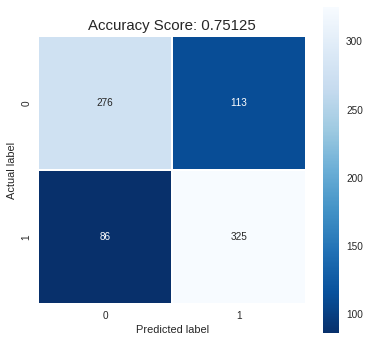

In [ ]:
score=logreg.score(X_test,y_test)
cm=metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt="d",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)

In [ ]:
score

0.75125

In [ ]:
logreg.coef_

array([[-1.55140386,  0.0149229 , -0.23901333,  0.35525601, -0.98900434,
        -0.02027009,  0.50463828,  0.0324639 , -1.31991439, -0.08724329]])

In [ ]:
accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]) 
accuracy

0.75125

In [ ]:
sensitivity=cm[1,1]/(cm[1,0]+cm[1,1]) 
sensitivity

0.7907542579075426

In [ ]:
specificity=cm[0,0]/(cm[0,0]+cm[0,1]) 
specificity

0.7095115681233933

In [ ]:
precision=cm[1,1]/(cm[0,1]+cm[1,1]) 
precision

0.7420091324200914

In [ ]:
metrics.recall_score(y_test,y_pred)

0.7907542579075426

In [ ]:
metrics.precision_score(y_test,y_pred)

0.7420091324200914

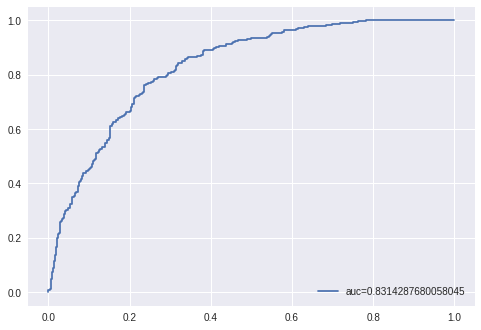

In [ ]:
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)

# Decision Trees and Variants

In [ ]:
features=['Length','Width','Size','Conc','Conc1','Asym','M3Long','M3Trans','Alpha','Dist']
target=['Class']
X=gamma[features]
y=gamma[target]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
y1=y<0.5

treeclf=DecisionTreeClassifier()
treeclf.fit(X,y1)
treeclf.fit(X_train,y_train)
yhat_valid=treeclf.predict(X_valid)
MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
valid_score=treeclf.score(X_valid,y_valid)

treeclf.fit(X_train,y_train)
yhat_test=treeclf.predict(X_test)
MSE_test=metrics.mean_squared_error(yhat_test,y_test)
test_score=treeclf.score(X_test,y_test)
print("Validation accuracy=",valid_score,", Test accuracy=",test_score)

Validation accuracy= 0.79 , Test accuracy= 0.805


In [ ]:
# Classification tree
for i in range(1,20):
  treeclf=DecisionTreeClassifier(max_depth=i)
  treeclf.fit(X,y1)
  treeclf.fit(X_train,y_train)
  yhat_valid=treeclf.predict(X_valid)
  MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
  valid_score=treeclf.score(X_valid,y_valid)

  treeclf.fit(X_train,y_train)
  yhat_test=treeclf.predict(X_test)
  MSE_test=metrics.mean_squared_error(yhat_test,y_test)
  test_score=treeclf.score(X_test,y_test)
  print("Max_depth=",i,", Validation accuracy=",valid_score,", Test accuracy=",test_score)

Max_depth= 1 , Validation accuracy= 0.78 , Test accuracy= 0.74
Max_depth= 2 , Validation accuracy= 0.785 , Test accuracy= 0.7525
Max_depth= 3 , Validation accuracy= 0.805 , Test accuracy= 0.8
Max_depth= 4 , Validation accuracy= 0.8025 , Test accuracy= 0.8025
Max_depth= 5 , Validation accuracy= 0.815 , Test accuracy= 0.8075
Max_depth= 6 , Validation accuracy= 0.8325 , Test accuracy= 0.8275
Max_depth= 7 , Validation accuracy= 0.8175 , Test accuracy= 0.83
Max_depth= 8 , Validation accuracy= 0.84 , Test accuracy= 0.83
Max_depth= 9 , Validation accuracy= 0.8325 , Test accuracy= 0.855
Max_depth= 10 , Validation accuracy= 0.82 , Test accuracy= 0.835
Max_depth= 11 , Validation accuracy= 0.79 , Test accuracy= 0.825
Max_depth= 12 , Validation accuracy= 0.8075 , Test accuracy= 0.81
Max_depth= 13 , Validation accuracy= 0.8025 , Test accuracy= 0.8225
Max_depth= 14 , Validation accuracy= 0.79 , Test accuracy= 0.8175
Max_depth= 15 , Validation accuracy= 0.7975 , Test accuracy= 0.8125
Max_depth= 16 , 

Looks like max_depth=9 gives best test accuracy.

In [ ]:
treeclf=DecisionTreeClassifier(max_depth=9)
treeclf.fit(X,y1)
treeclf.fit(X_train,y_train)
yhat_valid=treeclf.predict(X_valid)
MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
valid_score=treeclf.score(X_valid,y_valid)
treeclf.fit(X_train,y_train)
yhat_test=treeclf.predict(X_test)
MSE_test=metrics.mean_squared_error(yhat_test,y_test)
test_score=treeclf.score(X_test,y_test)

In [ ]:
treeclf.feature_importances_

array([0.21622786, 0.08201364, 0.12757093, 0.03286775, 0.04925697,
       0.03651415, 0.06404751, 0.01168076, 0.34060341, 0.03921701])

Get highest coefficients for Length and Alpha again.

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
y1_train = np.ravel(y_train)

rfclf=RandomForestClassifier()
rfclf.fit(X_train,y1_train)
yhat_valid=rfclf.predict(X_valid)
MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
valid_score=rfclf.score(X_valid,y_valid)
rfclf.fit(X_train,y_train)
yhat_test=rfclf.predict(X_test)
MSE_test=metrics.mean_squared_error(yhat_test,y_test)
test_score=rfclf.score(X_test,y_test)
  
print("Validation accuracy=",valid_score,", Test accuracy=",test_score)

Validation accuracy= 0.855 , Test accuracy= 0.885


In [ ]:
from sklearn.ensemble import RandomForestClassifier
y1_train = np.ravel(y_train)

# changing n_estimators
for i in range(1,30):
  rfclf=RandomForestClassifier(n_estimators=i)
  rfclf.fit(X_train,y1_train)
  yhat_valid=rfclf.predict(X_valid)
  MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
  valid_score=rfclf.score(X_valid,y_valid)

  rfclf.fit(X_train,y_train)
  yhat_test=rfclf.predict(X_test)
  MSE_test=metrics.mean_squared_error(yhat_test,y_test)
  test_score=rfclf.score(X_test,y_test)
  
  print("n_estimators=",i,", Validation accuracy=",valid_score,", Test accuracy=",test_score)

n_estimators= 1 , Validation accuracy= 0.7725 , Test accuracy= 0.8025
n_estimators= 2 , Validation accuracy= 0.7525 , Test accuracy= 0.76
n_estimators= 3 , Validation accuracy= 0.815 , Test accuracy= 0.8275
n_estimators= 4 , Validation accuracy= 0.785 , Test accuracy= 0.82
n_estimators= 5 , Validation accuracy= 0.83 , Test accuracy= 0.8325
n_estimators= 6 , Validation accuracy= 0.825 , Test accuracy= 0.835
n_estimators= 7 , Validation accuracy= 0.8425 , Test accuracy= 0.815
n_estimators= 8 , Validation accuracy= 0.8575 , Test accuracy= 0.855
n_estimators= 9 , Validation accuracy= 0.855 , Test accuracy= 0.8575
n_estimators= 10 , Validation accuracy= 0.8375 , Test accuracy= 0.8625
n_estimators= 11 , Validation accuracy= 0.8475 , Test accuracy= 0.8575
n_estimators= 12 , Validation accuracy= 0.8475 , Test accuracy= 0.86
n_estimators= 13 , Validation accuracy= 0.86 , Test accuracy= 0.8525
n_estimators= 14 , Validation accuracy= 0.8475 , Test accuracy= 0.845
n_estimators= 15 , Validation acc

In [ ]:
# changing max_depth
for i in range(1,30):
  rfclf=RandomForestClassifier(max_depth=i,n_estimators=21)
  rfclf.fit(X_train,y1_train)
  yhat_valid=rfclf.predict(X_valid)
  MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
  valid_score=rfclf.score(X_valid,y_valid)

  rfclf.fit(X_train,y_train)
  yhat_test=rfclf.predict(X_test)
  MSE_test=metrics.mean_squared_error(yhat_test,y_test)
  test_score=rfclf.score(X_test,y_test)
  print("max_depth=",i,", Validation accuracy=",valid_score,", Test accuracy=",test_score)

max_depth= 1 , Validation accuracy= 0.79 , Test accuracy= 0.7825
max_depth= 2 , Validation accuracy= 0.7225 , Test accuracy= 0.8225
max_depth= 3 , Validation accuracy= 0.81 , Test accuracy= 0.8275
max_depth= 4 , Validation accuracy= 0.81 , Test accuracy= 0.8425
max_depth= 5 , Validation accuracy= 0.815 , Test accuracy= 0.84
max_depth= 6 , Validation accuracy= 0.8275 , Test accuracy= 0.875
max_depth= 7 , Validation accuracy= 0.84 , Test accuracy= 0.85
max_depth= 8 , Validation accuracy= 0.8525 , Test accuracy= 0.845
max_depth= 9 , Validation accuracy= 0.86 , Test accuracy= 0.8475
max_depth= 10 , Validation accuracy= 0.855 , Test accuracy= 0.86
max_depth= 11 , Validation accuracy= 0.86 , Test accuracy= 0.86
max_depth= 12 , Validation accuracy= 0.8625 , Test accuracy= 0.8675
max_depth= 13 , Validation accuracy= 0.8625 , Test accuracy= 0.8625
max_depth= 14 , Validation accuracy= 0.865 , Test accuracy= 0.86
max_depth= 15 , Validation accuracy= 0.8625 , Test accuracy= 0.875
max_depth= 16 , V

In [ ]:
# changing min sample split The minimum number of samples required to split an internal node:
for i in range(2,20):
  rfclf=RandomForestClassifier(min_samples_split=i,n_estimators=21, max_depth=6)
  rfclf.fit(X_train,y1_train)
  yhat_valid=rfclf.predict(X_valid)
  MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
  valid_score=rfclf.score(X_valid,y_valid)

  rfclf.fit(X_train,y_train)
  yhat_test=rfclf.predict(X_test)
  MSE_test=metrics.mean_squared_error(yhat_test,y_test)
  test_score=rfclf.score(X_test,y_test)
  
  print("min_samples_split=",i,", Validation accuracy=",valid_score,", Test accuracy=",test_score)

min_samples_split= 2 , Validation accuracy= 0.8325 , Test accuracy= 0.8475
min_samples_split= 3 , Validation accuracy= 0.8325 , Test accuracy= 0.855
min_samples_split= 4 , Validation accuracy= 0.84 , Test accuracy= 0.8375
min_samples_split= 5 , Validation accuracy= 0.8225 , Test accuracy= 0.855
min_samples_split= 6 , Validation accuracy= 0.84 , Test accuracy= 0.8575
min_samples_split= 7 , Validation accuracy= 0.8475 , Test accuracy= 0.8525
min_samples_split= 8 , Validation accuracy= 0.815 , Test accuracy= 0.84
min_samples_split= 9 , Validation accuracy= 0.83 , Test accuracy= 0.855
min_samples_split= 10 , Validation accuracy= 0.8475 , Test accuracy= 0.8375
min_samples_split= 11 , Validation accuracy= 0.8375 , Test accuracy= 0.8475
min_samples_split= 12 , Validation accuracy= 0.825 , Test accuracy= 0.855
min_samples_split= 13 , Validation accuracy= 0.82 , Test accuracy= 0.855
min_samples_split= 14 , Validation accuracy= 0.8275 , Test accuracy= 0.85
min_samples_split= 15 , Validation accu

In [ ]:
for i in range(2,20):
  rfclf=RandomForestClassifier(min_samples_leaf=i,n_estimators=21, max_depth=6)
  rfclf.fit(X_train,y1_train)
  yhat_valid=rfclf.predict(X_valid)
  MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
  valid_score=rfclf.score(X_valid,y_valid)

  rfclf.fit(X_train,y_train)
  yhat_test=rfclf.predict(X_test)
  MSE_test=metrics.mean_squared_error(yhat_test,y_test)
  test_score=rfclf.score(X_test,y_test)
  
  print("min_samples_leaf=",i,", Validation accuracy=",valid_score,", Test accuracy=",test_score)

min_samples_leaf= 2 , Validation accuracy= 0.8375 , Test accuracy= 0.85
min_samples_leaf= 3 , Validation accuracy= 0.84 , Test accuracy= 0.85
min_samples_leaf= 4 , Validation accuracy= 0.825 , Test accuracy= 0.8475
min_samples_leaf= 5 , Validation accuracy= 0.8275 , Test accuracy= 0.8475
min_samples_leaf= 6 , Validation accuracy= 0.8275 , Test accuracy= 0.845
min_samples_leaf= 7 , Validation accuracy= 0.8275 , Test accuracy= 0.855
min_samples_leaf= 8 , Validation accuracy= 0.84 , Test accuracy= 0.8475
min_samples_leaf= 9 , Validation accuracy= 0.84 , Test accuracy= 0.855
min_samples_leaf= 10 , Validation accuracy= 0.845 , Test accuracy= 0.86
min_samples_leaf= 11 , Validation accuracy= 0.8275 , Test accuracy= 0.8375
min_samples_leaf= 12 , Validation accuracy= 0.8275 , Test accuracy= 0.8525
min_samples_leaf= 13 , Validation accuracy= 0.8325 , Test accuracy= 0.8525
min_samples_leaf= 14 , Validation accuracy= 0.8275 , Test accuracy= 0.84
min_samples_leaf= 15 , Validation accuracy= 0.82 , T

In [ ]:
rfclf.feature_importances_

# Gradient and XBG Boosting

In [ ]:
# gradient boosting for classification
from sklearn.ensemble import GradientBoostingClassifier
y1_train = np.ravel(y_train)

gbc=GradientBoostingClassifier()
gbc.fit(X_train,y1_train)
yhat_valid=gbc.predict(X_valid)
MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
valid_score=gbc.score(X_valid,y_valid)

gbc.fit(X_train,y_train)
yhat_test=gbc.predict(X_test)
MSE_test=metrics.mean_squared_error(yhat_test,y_test)
test_score=gbc.score(X_test,y_test)
print("Validation accuracy=",valid_score,", Test accuracy=",test_score)

Validation accuracy= 0.8725 , Test accuracy= 0.8675


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
y1_train = np.ravel(y_train)

for i in range(50, 400, 25):
  gbc=GradientBoostingClassifier(n_estimators=i)
  gbc.fit(X_train,y1_train)
  yhat_valid=gbc.predict(X_valid)
  MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
  valid_score=gbc.score(X_valid,y_valid)

  gbc.fit(X_train,y_train)
  yhat_test=gbc.predict(X_test)
  MSE_test=metrics.mean_squared_error(yhat_test,y_test)
  test_score=gbc.score(X_test,y_test)
  print("N_estimators=",i,"Validation accuracy=",valid_score,", Test accuracy=",test_score)

N_estimators= 50 Validation accuracy= 0.855 , Test accuracy= 0.8725
N_estimators= 75 Validation accuracy= 0.87 , Test accuracy= 0.875
N_estimators= 100 Validation accuracy= 0.8725 , Test accuracy= 0.865
N_estimators= 125 Validation accuracy= 0.8725 , Test accuracy= 0.875
N_estimators= 150 Validation accuracy= 0.875 , Test accuracy= 0.8725
N_estimators= 175 Validation accuracy= 0.87 , Test accuracy= 0.8675
N_estimators= 200 Validation accuracy= 0.865 , Test accuracy= 0.8725
N_estimators= 225 Validation accuracy= 0.865 , Test accuracy= 0.875
N_estimators= 250 Validation accuracy= 0.8675 , Test accuracy= 0.8725
N_estimators= 275 Validation accuracy= 0.8675 , Test accuracy= 0.875
N_estimators= 300 Validation accuracy= 0.8675 , Test accuracy= 0.885
N_estimators= 325 Validation accuracy= 0.865 , Test accuracy= 0.8775
N_estimators= 350 Validation accuracy= 0.8675 , Test accuracy= 0.875
N_estimators= 375 Validation accuracy= 0.8625 , Test accuracy= 0.8775


In [ ]:
for i in range(1,30):
  gbc=GradientBoostingClassifier(n_estimators=300, max_depth=i)
  gbc.fit(X_train,y1_train)
  yhat_valid=gbc.predict(X_valid)
  MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
  valid_score=gbc.score(X_valid,y_valid)

  gbc.fit(X_train,y_train)
  yhat_test=gbc.predict(X_test)
  MSE_test=metrics.mean_squared_error(yhat_test,y_test)
  test_score=gbc.score(X_test,y_test)
  print("max_depth=",i,"Validation accuracy=",valid_score,", Test accuracy=",test_score)

max_depth= 1 Validation accuracy= 0.8425 , Test accuracy= 0.84
max_depth= 2 Validation accuracy= 0.86 , Test accuracy= 0.86
max_depth= 3 Validation accuracy= 0.8675 , Test accuracy= 0.88
max_depth= 4 Validation accuracy= 0.86 , Test accuracy= 0.8725
max_depth= 5 Validation accuracy= 0.87 , Test accuracy= 0.8875
max_depth= 6 Validation accuracy= 0.8675 , Test accuracy= 0.8725
max_depth= 7 Validation accuracy= 0.8625 , Test accuracy= 0.88
max_depth= 8 Validation accuracy= 0.865 , Test accuracy= 0.8775
max_depth= 9 Validation accuracy= 0.8775 , Test accuracy= 0.8725
max_depth= 10 Validation accuracy= 0.87 , Test accuracy= 0.8625
max_depth= 11 Validation accuracy= 0.86 , Test accuracy= 0.87
max_depth= 12 Validation accuracy= 0.8675 , Test accuracy= 0.86
max_depth= 13 Validation accuracy= 0.865 , Test accuracy= 0.86
max_depth= 14 Validation accuracy= 0.855 , Test accuracy= 0.8575


KeyboardInterrupt: ignored

In [ ]:
gbc=GradientBoostingClassifier(n_estimators=300, max_depth=5, learning_rate=0.2)
gbc.fit(X_train,y1_train)
yhat_valid=gbc.predict(X_valid)
MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
valid_score=gbc.score(X_valid,y_valid)

gbc.fit(X_train,y_train)
yhat_test=gbc.predict(X_test)
MSE_test=metrics.mean_squared_error(yhat_test,y_test)
test_score=gbc.score(X_test,y_test)
print("Validation accuracy=",valid_score,", Test accuracy=",test_score)

Validation accuracy= 0.8675 , Test accuracy= 0.875


In [ ]:
gbc=GradientBoostingClassifier(n_estimators=300, max_depth=5, subsample=0.8)
gbc.fit(X_train,y1_train)
yhat_valid=gbc.predict(X_valid)
MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
valid_score=gbc.score(X_valid,y_valid)

gbc.fit(X_train,y_train)
yhat_test=gbc.predict(X_test)
MSE_test=metrics.mean_squared_error(yhat_test,y_test)
test_score=gbc.score(X_test,y_test)
print("Validation accuracy=",valid_score,", Test accuracy=",test_score)

Validation accuracy= 0.87 , Test accuracy= 0.8725


In [ ]:
# XGB Boosting for classification
from xgboost import XGBClassifier
xgbclf=XGBClassifier()
xgbclf.fit(X_train,y1_train)
yhat_valid=xgbclf.predict(X_valid)
MSE_valid=metrics.mean_squared_error(yhat_valid,y_valid)
valid_score=xgbclf.score(X_valid,y_valid)

xgbclf.fit(X_train,y_train)
yhat_test=xgbclf.predict(X_test)
MSE_test=metrics.mean_squared_error(yhat_test,y_test)
test_score=xgbclf.score(X_test,y_test)
print("Validation accuracy=",valid_score,", Test accuracy=",test_score)

# Neural Networks

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow
import keras

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
y1_train = np.ravel(y_train)

In [ ]:
gamma

In [ ]:
import seaborn as sns
import matplotlib as plt
corr = gamma.corr()
sns.heatmap(corr, 
            xticklabels=gamma.columns.values,
            yticklabels=gamma.columns.values)

Not much light in this diagram except length and width. could test the correlation between these variables.

In [ ]:
gamma['Length'].corr( gamma["Width"])

In [ ]:
gamma['Length'].corr( gamma["Size"])

In [ ]:
gamma['Size'].corr( gamma["Width"])

In [ ]:
# Normalise variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# RMSProp, epochs=20, batch_size=40
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import Adam
y1_train = np.ravel(y_train)

model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

# opt = Adam(learning_rate=0.01)
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(X_train,y1_train,epochs=20,batch_size=40, verbose=1, validation_data=(X_test, y_test))

#plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
epochs=20
#plot history for loss
name = " Loss, Epochs {}".format(epochs)
plt.figure(name)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#get and display model test score and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# AdaGrad, epochs=20, batch_size=40
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import Adam
y1_train = np.ravel(y_train)

model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

# opt = Adam(learning_rate=0.01)
model.compile(optimizer="AdaGrad",loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(X_train,y1_train,epochs=20,batch_size=40, verbose=1, validation_data=(X_test, y_test))

#plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
epochs=20
#plot history for loss
name = " Loss, Epochs {}".format(epochs)
plt.figure(name)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#get and display model test score and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Adam, epochs=20, batch_size=40
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import Adam
y1_train = np.ravel(y_train)

model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

# opt = Adam(learning_rate=0.01)
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(X_train,y1_train,epochs=20,batch_size=40, verbose=1, validation_data=(X_test, y_test))

#plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
epochs=20
#plot history for loss
name = " Loss, Epochs {}".format(epochs)
plt.figure(name)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#get and display model test score and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Changing the learning rate of adam
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import Adam
y1_train = np.ravel(y_train)

model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(X_train,y1_train,epochs=20,batch_size=40, verbose=1, validation_data=(X_test, y_test))

#plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
epochs=20
#plot history for loss
name = " Loss, Epochs {}".format(epochs)
plt.figure(name)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#get and display model test score and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))